# Handwritten Digit Recognition using Random Forest
This notebook implements a Random Forest Classifier to recognize handwritten digits from the MNIST dataset.
It includes data exploration, visualization, model training, evaluation, and a custom prediction function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image, ImageOps
import os

# Configure visualization
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading

In [2]:
# Load the dataset
# As per instructions, the file is in the same folder
try:
    df = pd.read_csv('digit.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'digit.csv' not found. Please ensure the file is in the same directory.")

Dataset loaded successfully!
Shape: (42000, 785)


## 2. Data Exploration & Visualization

In [3]:
# Display first few rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Target Distribution
Checking for class imbalance.

C:\Users\Asus\AppData\Local\Temp\ipykernel_11412\3882178159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


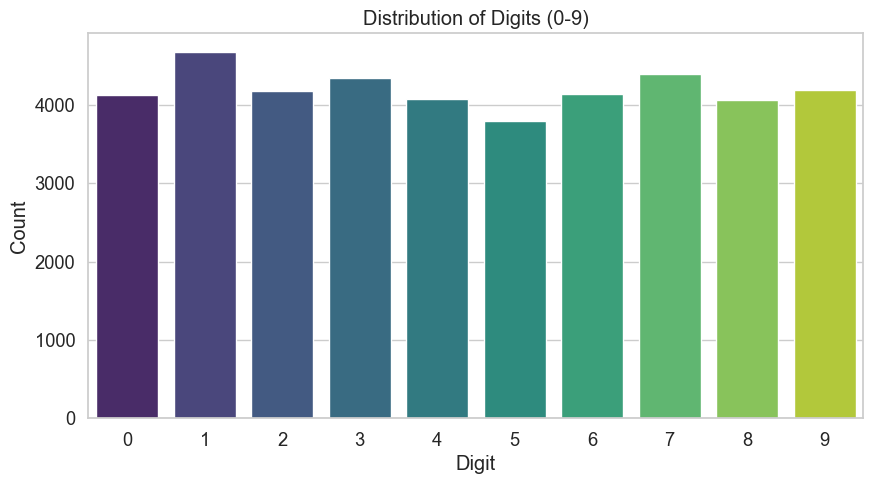

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Digits (0-9)')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

### Sample Digits Visualization
Let's look at some random samples from the dataset.

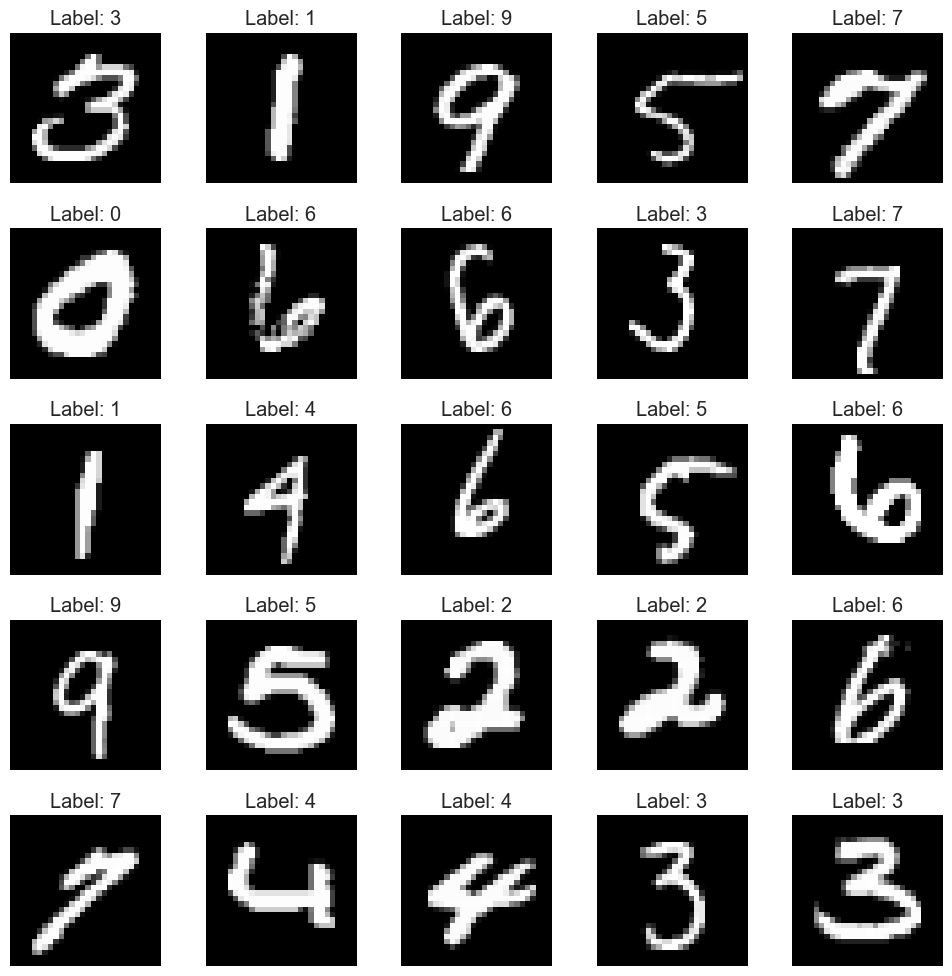

In [5]:
def plot_sample_digits(data, labels, n=25):
    plt.figure(figsize=(10, 10))
    indices = np.random.randint(0, len(data), n)
    
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        # Pixels are from column 1 onwards (column 0 is label)
        image = data.iloc[idx].values.reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {labels.iloc[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

plot_sample_digits(X, y)

## 3. Data Preprocessing

In [6]:
# Normalize pixel values (0-255 -> 0-1)
# This helps the model converge faster (though Random Forest is robust to scaling, it's good practice)
X = X / 255.0

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (33600, 784)
Testing Data Shape: (8400, 784)


## 4. Model Training (Random Forest)

In [7]:
# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training the model... This may take a moment.")
clf.fit(X_train, y_train)
print("Model created and trained!")

Training the model... This may take a moment.
Model created and trained!


## 5. Evaluation

In [8]:
# Make predictions
y_pred = clf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.30%


### Confusion Matrix Heatmap

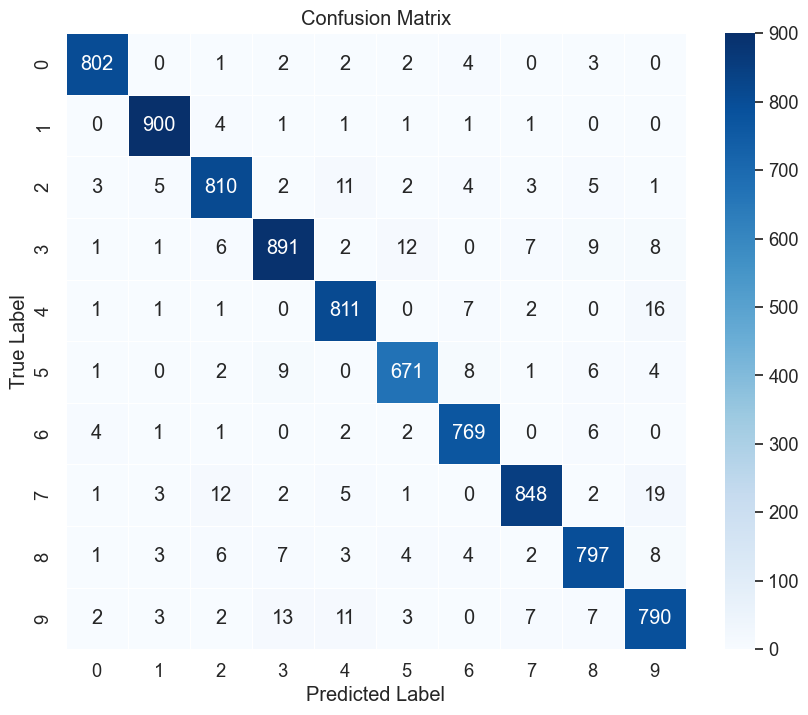

In [ ]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Classification Report

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



## 6. Feature Importance Visualization
Seeing which pixels are most important for distinguishing digits.

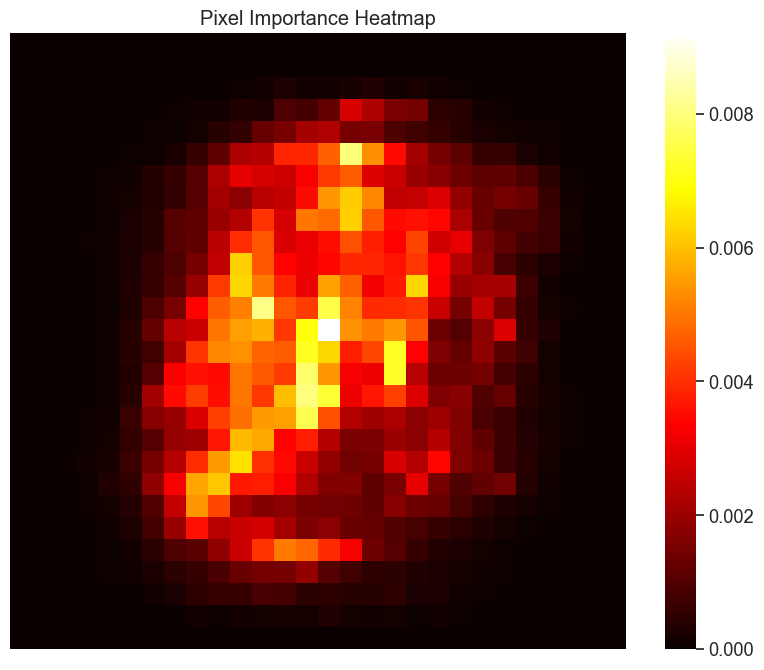

In [11]:
importances = clf.feature_importances_
# Reshape to 28x28 image
importance_img = importances.reshape(28, 28)

plt.figure(figsize=(10, 8))
sns.heatmap(importance_img, cmap='hot', square=True)
plt.title('Pixel Importance Heatmap')
plt.axis('off')
plt.show()

## 7. Misclassified Examples
Let's see where the model made errors.

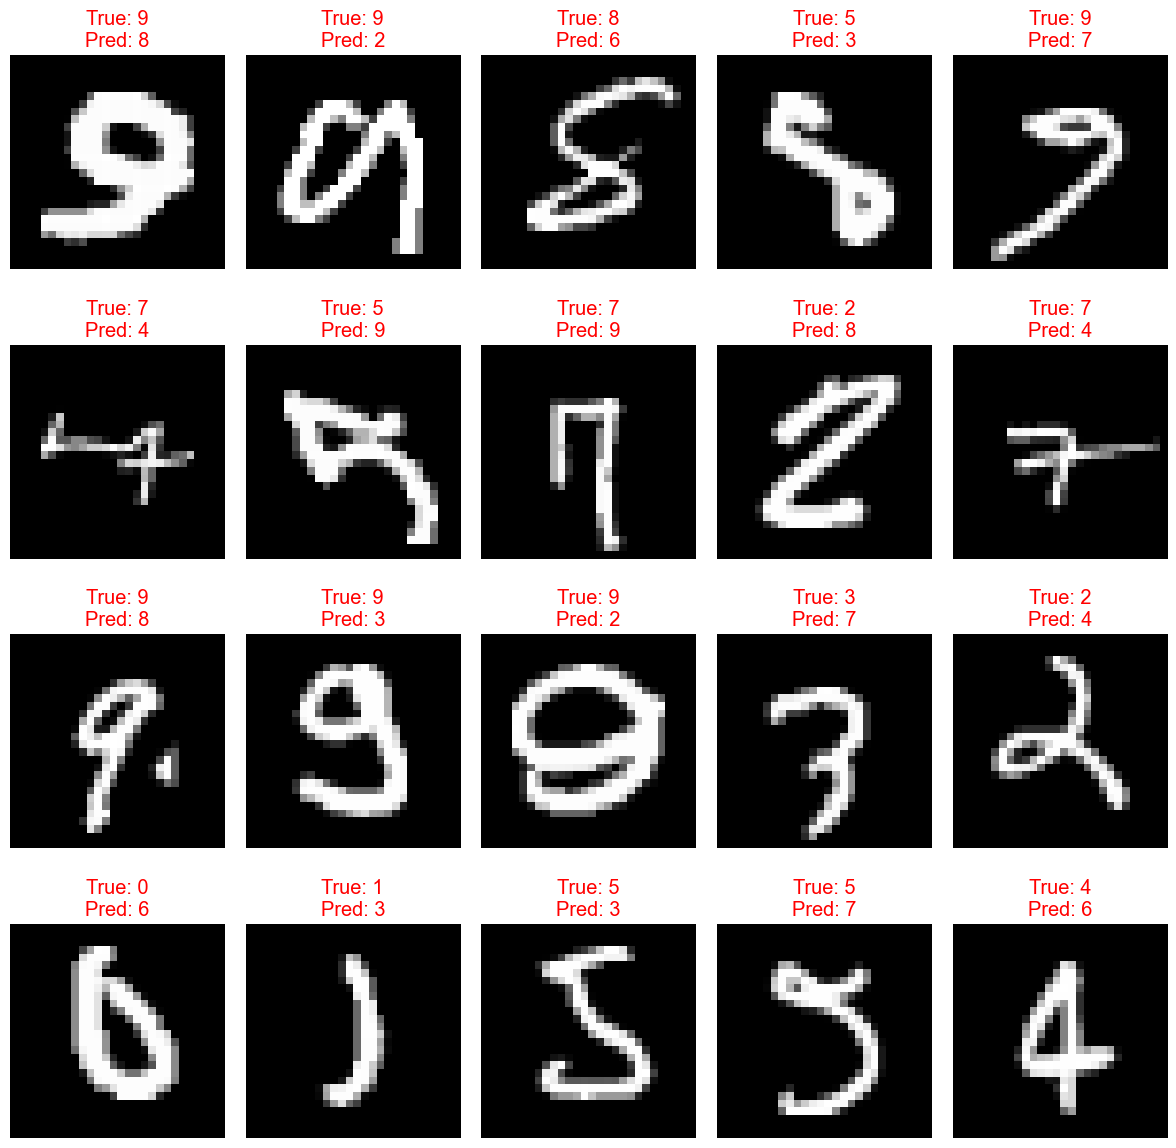

In [12]:
# Find indices where predictions didn't match ground truth
misclassified_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:20]): # Show first 20 errors
    plt.subplot(4, 5, i + 1)
    
    # We need to access X_test by index (iloc for pandas)
    image = X_test.iloc[idx].values.reshape(28, 28)
    true_label = y_test.iloc[idx]
    pred_label = y_pred[idx]
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 8. Custom Prediction Interface
Predict on your own handwritten digit image.

Example prediction on 'test_digit.png':


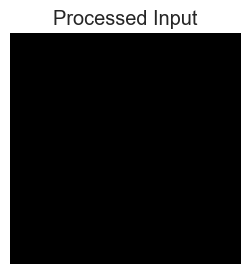


>>> Predicted Digit: 7 (Confidence: 0.38)

To use this with your own image:
1. Create a 28x28 image (or any size) with a digit.
2. Save it as 'my_digit.png' in this folder.
3. Run: predict_custom_image('my_digit.png', clf)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
def predict_custom_image(image_path, model):
    try:
        # Load image
        img = Image.open(image_path).convert('L') # Convert to grayscale
        
        # Invert if the image is white background/black digit (MNIST is black background/white digit)
        # We assume typical drawing apps save white background.
        # Check corner pixel; if bright, invert.
        if np.mean(img) > 127: 
             img = ImageOps.invert(img)
        
        # Resize to 28x28
        img = img.resize((28, 28), Image.Resampling.LANCZOS)
        
        # Convert to numpy array and normalize
        img_array = np.array(img) / 255.0
        
        # Display the processed image
        plt.figure(figsize=(3,3))
        plt.imshow(img_array, cmap='gray')
        plt.title('Processed Input')
        plt.axis('off')
        plt.show()
        
        # Flatten for prediction (1 row, 784 columns)
        img_flat = img_array.reshape(1, 784)
        
        # Predict
        prediction = model.predict(img_flat)[0]
        confidence = np.max(model.predict_proba(img_flat))
        
        print(f"\n>>> Predicted Digit: {prediction} (Confidence: {confidence:.2f})")
        return prediction
        
    except Exception as e:
        print(f"Error processing image: {e}")

# Example Usage:
# Create a dummy image for demonstration if one doesn't exist
if not os.path.exists('test_digit.png'):
    # Create a simple image (e.g. a black image) just to prevent error in example
    # In real usage, you would upload a drawing
    dummy_img = Image.new('L', (28, 28), color=0)
    dummy_img.save('test_digit.png')

print("Example prediction on 'test_digit.png':")
predict_custom_image('test_digit.png', clf)

print("\nTo use this with your own image:")
print("1. Create a 28x28 image (or any size) with a digit.")
print("2. Save it as 'my_digit.png' in this folder.")
print("3. Run: predict_custom_image('my_digit.png', clf)")

## 9. Final Output Testing (Single Prediction)
Visualizing a single prediction from the test set as requested.

Predicted ======> 6


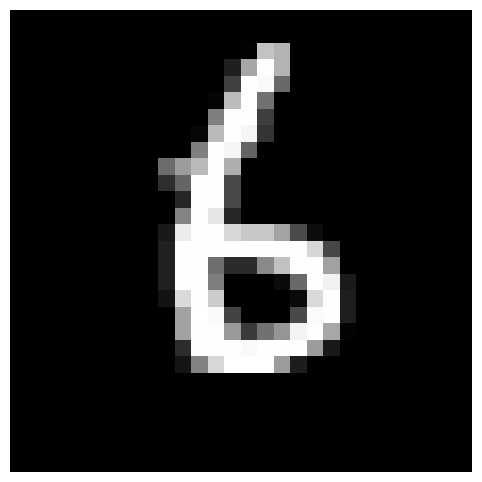

In [18]:
import matplotlib.pyplot as plt

# You can change this index to see different digits from the test set
index = 1437

# Get the prediction for this specific index
# Note: X_test is a DataFrame, so we use .iloc to get the row
prediction = clf.predict(X_test.iloc[[index]])[0]

print("Predicted ======> " + str(prediction))

plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28, 28)), cmap='gray')
plt.show()